# Agenda - Movie Recommendation system 

1. Intro & high-level overview - rayhana
2. Demo - Brett
3. Data cleaning/pre-processing & methods + show the notebook/criteria for recommendation (ratings) -Joy
4. all of the bugs/errors/roadblocks...what we learned - Leah
5. what we would do if we could continue the project - Avery

#### by Team Green 
- Avery Mavroudis Data Engineer | IBM Technology Garage
- Brett Brumbaugh Data Scientist | IBM Tech Garage
- Joy Yang(you) Data Scientist | IBM Tech Garage
- Leah Krasnick Data Scientist | IBM Tech Garage
- Rayhana Msadek Data Scientist | IBM Technology Garage

# Call project-lib function

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='dbcc681d-cfed-447b-a461-da1700fa5c2b', project_access_token='p-99b732f9da215664be7a5eaf5aefd6c198e2f5f7')
pc = project.project_context


# Load Data

In [3]:
# @hidden_cell


# This connection object is used to access your data and contains your credentials or project token.
# You might want to remove those credentials before you share your notebook.


import os, ibm_db, ibm_db_dbi as dbi, pandas as pd

DB2_teamGreen_dsn = 'DATABASE={};HOSTNAME={};PORT={};PROTOCOL=TCPIP;UID={uid};PWD={pwd};SECURITY=SSL'.format(
    'bludb',
    'a94f2d31-7523-460c-a4b0-981e8518fe33.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud',
    30230,
    uid='b445c9df',
    pwd="""ceDhO4EPes2dAq0m"""
)

DB2_teamGreen_connection = dbi.connect(DB2_teamGreen_dsn)
   
query = 'SELECT * FROM "TEAM_GREEN"."MOVIES"'

movie = pd.read_sql_query(query, con=DB2_teamGreen_connection)
movie.head()


,COLUMN_0,MOVIE_ID,TITLE,GENRES
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy


In [44]:
movie.shape

(3883, 4)

In [4]:
new_movie = movie.drop(columns='COLUMN_0')

In [5]:
movie.TITLE[0].split("(")

['Toy Story ', '1995)']

In [6]:
new_movie[['clean_TITLE','YEAR']] = new_movie.TITLE.str.split("(", 
                                                              expand=True).drop(columns=[2,3])

In [7]:
new_movie[['YEAR']] = new_movie.YEAR.str.replace("\)","")

<ipython-input-7-a287b74fbfa0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_movie[['YEAR']] = new_movie.YEAR.str.replace("\)","")


In [8]:
new_movie.head(5)

,MOVIE_ID,TITLE,GENRES,clean_TITLE,YEAR
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [9]:
# define a function that splits the column genre into a list containing one or more 'genres'
def genre_convert(string):
    li = list(string.split("|"))
    return li

In [10]:
new_movie["GENRES"]=new_movie["GENRES"].apply(genre_convert)

In [11]:
new_movie.head(5)

,MOVIE_ID,TITLE,GENRES,clean_TITLE,YEAR
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",Toy Story,1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",Jumanji,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II,1995


# Data cleaning with Ratings

In [12]:

query = 'SELECT * FROM "TEAM_GREEN"."RATINGS"'

ratings = pd.read_sql_query(query, con=DB2_teamGreen_connection)
ratings.head()

# After use, close the database connection with the following code:
# DB2_teamGreen_connection.close()


,COLUMN_0,USER_ID,MOVIE_ID,RATING,TIMESTAMP,USER_EMB_ID,MOVIE_EMB_ID
0,0,1,1193,5,978300760,0,1192
1,1,1,661,3,978302109,0,660
2,2,1,914,3,978301968,0,913
3,3,1,3408,4,978300275,0,3407
4,4,1,2355,5,978824291,0,2354


In [45]:
ratings.shape

(1000209, 7)

In [13]:
new_ratings=ratings.drop(columns=['COLUMN_0', 'USER_EMB_ID','MOVIE_EMB_ID'])

In [14]:
from datetime import datetime

# define a function that convert timestamp object to datetime
def timestamp_convert(time):
    dt = datetime.fromtimestamp(time)
    return dt

In [15]:
new_ratings["TIMESTAMP"]=new_ratings["TIMESTAMP"].apply(timestamp_convert)
new_ratings.head(5)

,USER_ID,MOVIE_ID,RATING,TIMESTAMP
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


# data cleaning w/ users

In [16]:
query = 'SELECT * FROM "TEAM_GREEN"."USERS"'

users = pd.read_sql_query(query, con=DB2_teamGreen_connection)
users.head()

# After use, close the database connection with the following code:
# DB2_teamGreen_connection.close()


,COLUMN_0,USER_ID,GENDER,AGE,OCCUPATION,ZIPCODE,AGE_DESC,OCC_DESC
0,0,1,F,1,10,48067,Under 18,K-12 student
1,1,2,M,56,16,70072,56+,self-employed
2,2,3,M,25,15,55117,25-34,scientist
3,3,4,M,45,7,02460,45-49,executive/managerial
4,4,5,M,25,20,55455,25-34,writer


In [46]:
users.shape

(6040, 8)

In [18]:
users.OCCUPATION.nunique()

21

In [19]:
users.OCC_DESC.nunique()

21

In [20]:
new_users=users.drop(columns=['COLUMN_0','AGE_DESC','OCCUPATION'])

<AxesSubplot:>

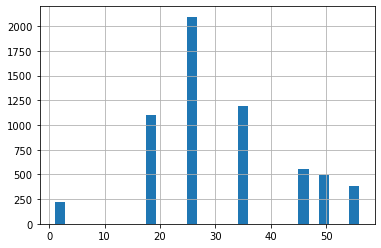

In [21]:
new_users.AGE.hist(bins=30)

# Data Exploration

- Total # of movie
- Total # of users
- Total # of ratings per movie
- Total # of ratings per user
- Avg. movie ratings given
- Avg. user ratings given out

In [21]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_05d41dd92e044e74a239857149c6b83d = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_05d41dd92e044e74a239857149c6b83d = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_05d41dd92e044e74a239857149c6b83d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JwYlqN9pAX3XyGnxhh5yippuz6ZgAgsQBPkJcwHRpBfb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_05d41dd92e044e74a239857149c6b83d)

body = client_05d41dd92e044e74a239857149c6b83d.get_object(Bucket='databootcampmoviesuggestionprojec-donotdelete-pr-qqk8bjd7rqs3gi',Key='data_asset/RATINGS_shaped_7wy6rr1zlyzlbwy4d21fz1t2d')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rating_shape = pd.read_csv(body)
rating_shape.head()


,USER_ID,MOVIE_ID,RATING,TIMESTAMP,USER_EMB_ID,MOVIE_EMB_ID,TITLE,GENRES,GENDER,AGE,OCCUPATION,ZIPCODE,AGE_DESC,OCC_DESC
0,148,1088,4,979576198,147,1087,Dirty Dancing (1987),Musical|Romance,M,50,17,57747,50-55,technician/engineer
1,148,1580,4,977333525,147,1579,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi,M,50,17,57747,50-55,technician/engineer
2,148,2122,4,979576798,147,2121,Children of the Corn (1984),Horror|Thriller,M,50,17,57747,50-55,technician/engineer
3,148,2142,4,979578765,147,2141,"American Tail: Fievel Goes West, An (1991)",Animation|Children's|Comedy,M,50,17,57747,50-55,technician/engineer
4,148,2366,5,977333254,147,2365,King Kong (1933),Action|Adventure|Horror,M,50,17,57747,50-55,technician/engineer


In [22]:
rating_shape.shape

(1000209, 14)

## Data Exploration - movie

In [23]:
new_movie.describe()

,MOVIE_ID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [24]:
new_movie.MOVIE_ID.nunique()

3883

In [25]:
new_users.describe()

,USER_ID,AGE
count,6040.000000,6040.000000
mean,3020.500000,30.639238
std,1743.742145,12.895962
min,1.000000,1.000000
25%,1510.750000,25.000000
50%,3020.500000,25.000000
75%,4530.250000,35.000000
max,6040.000000,56.000000


In [26]:
new_users.USER_ID.nunique()

6040

In [27]:
new_ratings.RATING.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: RATING, dtype: float64

In [28]:
import numpy as np
movie_rating_agg = new_ratings.groupby('MOVIE_ID')['RATING'].agg(['size', 'mean']).reset_index()
movie_rating_agg.sort_values('size', ascending=False).head(10)

,MOVIE_ID,size,mean
2651,2858,3428,4.317386
253,260,2991,4.453694
1106,1196,2990,4.292977
1120,1210,2883,4.022893
466,480,2672,3.763847
1848,2028,2653,4.337354
575,589,2649,4.058513
2374,2571,2590,4.315830
1178,1270,2583,3.990321
579,593,2578,4.351823


In [29]:
movie_rating_agg.sort_values('mean', ascending=False).head(10)

,MOVIE_ID,size,mean
926,989,1,5.0
3635,3881,1,5.0
1652,1830,1,5.0
3152,3382,1,5.0
744,787,3,5.0
3054,3280,1,5.0
3367,3607,1,5.0
3010,3233,2,5.0
2955,3172,1,5.0
3414,3656,1,5.0


In [30]:
user_rating_agg = new_ratings.groupby('USER_ID')['RATING'].agg(['size', 'mean']).reset_index()
user_rating_agg.sort_values('size', ascending=False).head(10)

,USER_ID,size,mean
4168,4169,2314,3.551858
1679,1680,1850,3.555676
4276,4277,1743,4.134825
1940,1941,1595,3.054545
1180,1181,1521,2.815911
888,889,1518,2.840580
3617,3618,1344,3.008185
2062,2063,1323,2.945578
1149,1150,1302,2.590630
1014,1015,1286,3.726283


In [31]:
user_rating_agg.describe()

,USER_ID,size,mean
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,165.597517,3.702705
std,1743.742145,192.747029,0.429622
min,1.000000,20.000000,1.015385
25%,1510.750000,44.000000,3.444444
50%,3020.500000,96.000000,3.735294
75%,4530.250000,208.000000,4.000000
max,6040.000000,2314.000000,4.962963


In [32]:
movie_rating_agg.describe()

,MOVIE_ID,size,mean
count,3706.000000,3706.000000,3706.000000
mean,1995.573125,269.889099,3.238892
std,1151.148045,384.047838,0.672925
min,1.000000,1.000000,1.000000
25%,989.250000,33.000000,2.822705
50%,2033.500000,123.500000,3.331546
75%,2990.750000,350.000000,3.740741
max,3952.000000,3428.000000,5.000000


In [22]:
user_matrix = new_ratings.pivot(index='USER_ID', columns='MOVIE_ID', values='RATING')
user_matrix.head()

MOVIE_ID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## originally we've only wanted to use the smaller dataset
We only want qualified users and movie for the model, so we set below criteria:
- min 100 users should've voted a movie
- min 100 movies should've voted by

In [27]:
user_voted = new_ratings.groupby('USER_ID')['RATING'].agg('count')
movies_voted = new_ratings.groupby('MOVIE_ID')['RATING'].agg('count')
new_user_matrix = user_matrix.loc[user_voted[user_voted > 100].index, movies_voted[movies_voted > 100].index]

In [28]:
new_user_matrix
new_user_matrix.fillna(0,inplace=True)
new_user_matrix.head()

MOVIE_ID,1,2,3,4,5,6,7,9,10,11,...,3927,3928,3929,3930,3932,3936,3937,3948,3949,3952
USER_ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
10,5.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


## Eventually we've decided to use a larger data set

In [23]:
user_matrix.fillna(0,inplace=True)

In [25]:
import numpy as np
#R = new_user_matrix.to_numpy()
R = user_matrix.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [29]:
n_users = new_user_matrix.shape[0]
n_movies = new_user_matrix.shape[1]

In [30]:
sparsity = round(1.0 - len(user_matrix) / float(n_users * n_movies), 3)

print('The sparsity level of MOVIE/RATING dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MOVIE/RATING dataset is 99.9%


In [31]:
len(new_user_matrix)

2909

In [32]:
len(new_user_matrix) / float(n_users * n_movies)

0.0004985044865403788

## Create a function that allow interaction by inputing 
- number of recommendations
- list the latest movies watched by the user
- user

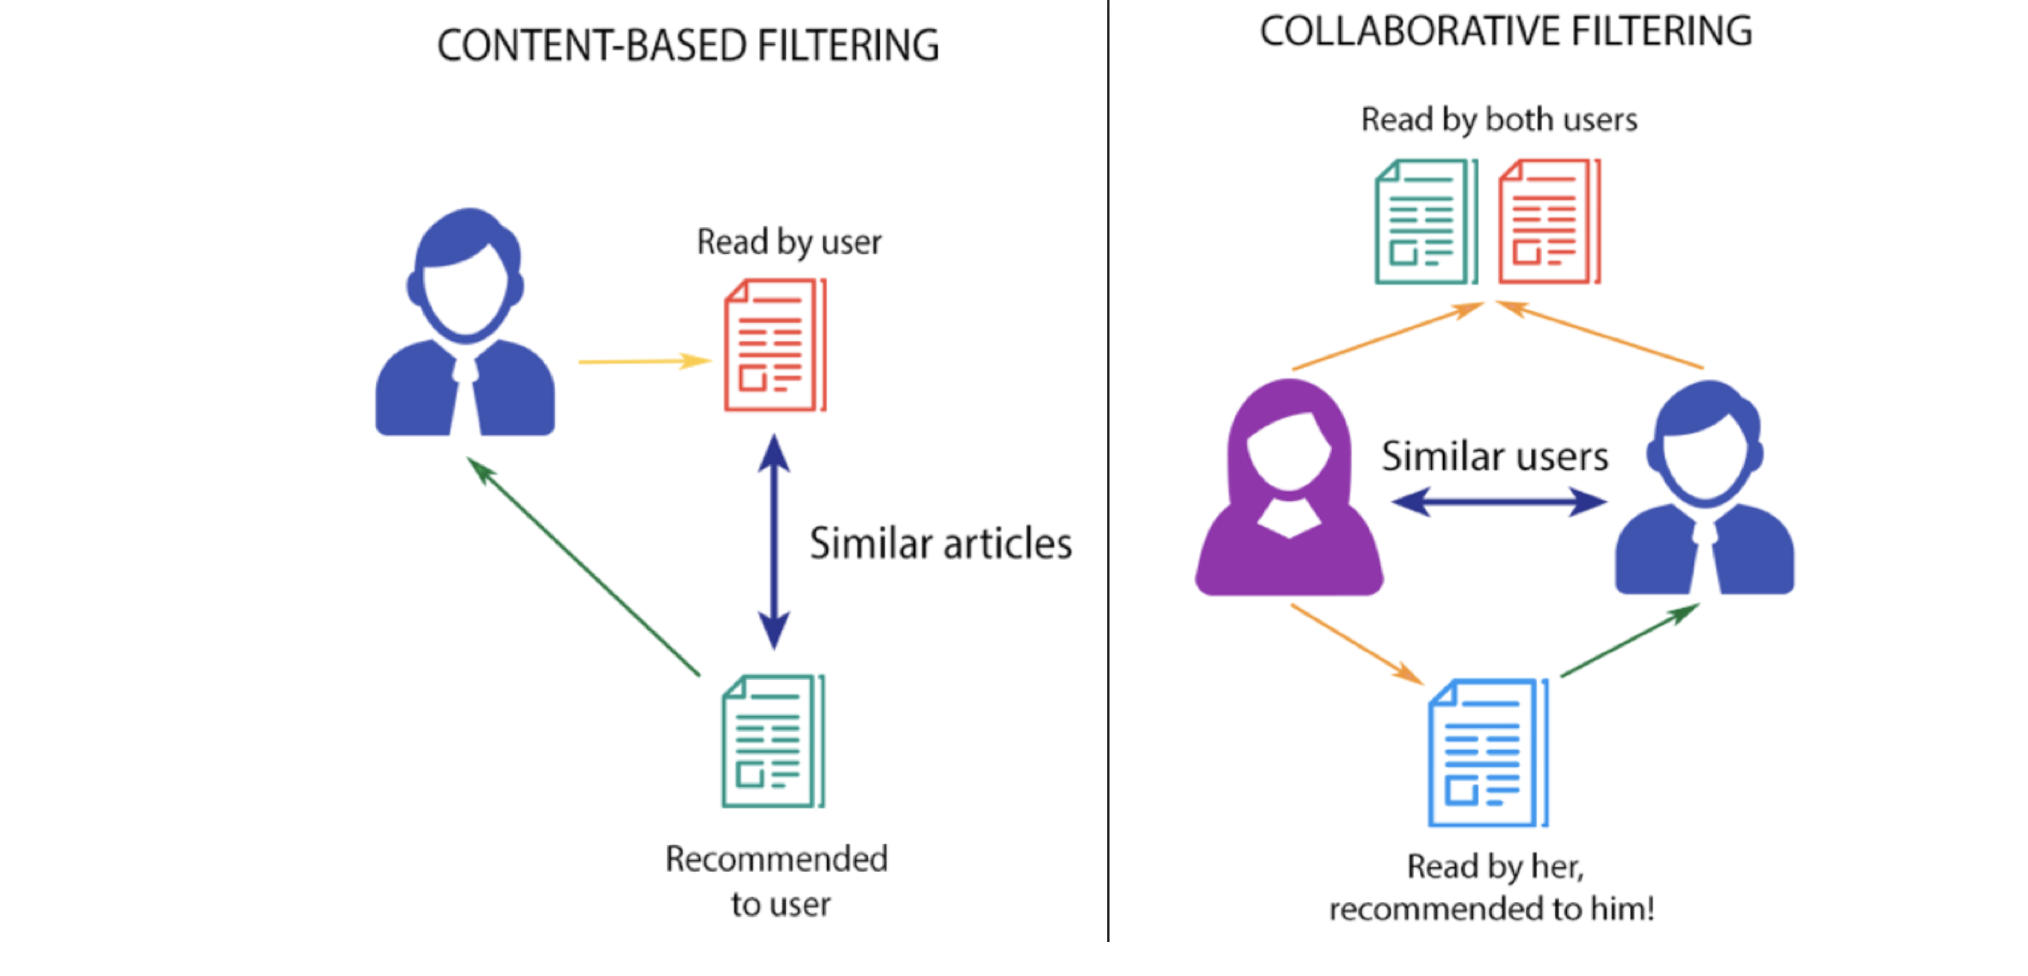

## Model-based Collaborative Filtering
### SET UP SVD (Singular Value Decomposition)
- this is the matrix factorization method that can build a machine learning algorithm with more ratings, which can potentially make our model more accurate.
- Model-based Collaborative Filtering is based on the matrix factorization (MF)

In [33]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [34]:
sigma = np.diag(sigma)
sigma

array([[ 147.18581225,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  147.62154312,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  148.58855276, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  574.46932602,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         670.41536276,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        , 1544.10679346]])

In [35]:
## MAKE PREDICTION
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
all_user_predicted_ratings

array([[ 4.28886061,  0.14305516, -0.1950795 , ...,  0.03191195,
         0.05044975,  0.08891033],
       [ 0.74471587,  0.16965927,  0.33541808, ..., -0.10110207,
        -0.0540982 , -0.14018846],
       [ 1.81882382,  0.45613623,  0.09097801, ...,  0.01234452,
         0.01514752, -0.10995596],
       ...,
       [ 0.61908871, -0.16176859,  0.10673806, ..., -0.01336948,
        -0.0303543 , -0.11493552],
       [ 1.50360483, -0.03620761, -0.16126817, ..., -0.01090407,
        -0.03864749, -0.16835943],
       [ 1.99624816, -0.18598715, -0.1564782 , ..., -0.00664061,
         0.12706713,  0.28500112]])

In [36]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = user_matrix.columns)
preds.head()

MOVIE_ID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [37]:
def recommend_movies(user_id, num_recommendations):
        
        # Get and sort the user's predictions
        user_row_number = user_id - 1 # User ID starts at 1, not 0
        sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
        
        # Get the user's data and merge in the movie information.
        user_data = new_ratings[new_ratings.USER_ID == (user_id)]
        user_ratings = (user_data.merge(new_movie, how = 'left', left_on = 'MOVIE_ID', right_on = 'MOVIE_ID').
                         sort_values(['RATING'], ascending=False)
                     )
        
        print('User {0} has already rated {1} movies.'.format(user_id, user_ratings.shape[0]))
        print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations = (new_movie[~new_movie['MOVIE_ID'].isin(user_ratings['MOVIE_ID'])].merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                   left_on = 'MOVIE_ID',
                   right_on = 'MOVIE_ID').rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1])
    
        user_full_list = user_ratings.TITLE.tolist()
        recommendations_list = recommendations.TITLE.tolist()
        return user_full_list, recommendations_list


In [38]:
already_rated, predictions = recommend_movies(10, 20)

User 10 has already rated 401 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [39]:
# All movies that User 10 has rated/ watched
already_rated

["Midsummer Night's Dream, A (1999)",
 'Mary Poppins (1964)',
 'Shaggy Dog, The (1959)',
 'Out of Africa (1985)',
 'Life Is Beautiful (La Vita � bella) (1997)',
 'Hero (1992)',
 'Grease (1978)',
 'Gone with the Wind (1939)',
 'Independence Day (ID4) (1996)',
 'Sixth Sense, The (1999)',
 'Winnie the Pooh and the Blustery Day (1968)',
 'Rain Man (1988)',
 'Trekkies (1997)',
 'Labyrinth (1986)',
 'Anna and the King (1999)',
 'Twelve Monkeys (1995)',
 'Nell (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Cocoon (1985)',
 'Elizabeth (1998)',
 'Willow (1988)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'That Thing You Do! (1996)',
 'Christmas Vacation (1989)',
 'Wizard of Oz, The (1939)',
 'Meet Me in St. Louis (1944)',
 'Roman Holiday (1953)',
 'Sabrina (1954)',
 'Producers, The (1968)',
 'Interview with the Vampire (1994)',
 'Election (1999)',
 'My Cousin Vinny (1992)',
 'Star Trek: Generations (1994)',
 'Fisher King, The (1991)',
 'NeverE

In [40]:
# Top 20 movies that User 10 hopefully will enjoy
predictions

['Who Framed Roger Rabbit? (1988)',
 'Muppet Movie, The (1979)',
 'Dave (1993)',
 'Spaceballs (1987)',
 'Romancing the Stone (1984)',
 'Sneakers (1992)',
 'American President, The (1995)',
 'Fifth Element, The (1997)',
 'Babe (1995)',
 'King and I, The (1956)',
 'To Kill a Mockingbird (1962)',
 'Dead Poets Society (1989)',
 'Dumbo (1941)',
 'Some Like It Hot (1959)',
 'Ladyhawke (1985)',
 'Clockwork Orange, A (1971)',
 'Jerry Maguire (1996)',
 'Good Morning, Vietnam (1987)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Total Recall (1990)']

In [78]:
import pickle
# Save prediction as file to Watson Studio's COS for retrieval
file_name = 'preds.pkl'
pickle.dump(preds, open(file_name, 'wb')) 
with open(file_name, "rb") as in_file:
    data = in_file.read()
project.save_data(file_name, data)
    
# We'll use this to reload from our Streamlit app
preds = pickle.load(open(file_name, 'rb'))

In [2]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 22.0 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-linux_x86_64.whl size=2132027 sha256=241a1b2e10c3b43f63c80c2f20834cb848c0b2c38f49daa5b3515e633da5d1b2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise


In [81]:
new_ratings

,USER_ID,MOVIE_ID,RATING,TIMESTAMP
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48


In [41]:
import surprise

# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(new_ratings[['USER_ID', 'MOVIE_ID', 'RATING']], reader)

In [42]:
# Use the SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8718  0.8722  0.8733  0.8749  0.8748  0.8734  0.0013  
MAE (testset)     0.6845  0.6849  0.6853  0.6863  0.6865  0.6855  0.0008  
Fit time          54.60   55.67   55.21   55.30   55.17   55.19   0.34    
Test time         3.17    3.41    3.14    3.33    3.82    3.38    0.24    


{'test_rmse': array([0.87184094, 0.87222338, 0.87329376, 0.8748902 , 0.87484924]),
 'test_mae': array([0.68451634, 0.68485705, 0.68529287, 0.6862718 , 0.68653507]),
 'fit_time': (54.60317611694336,
  55.66544842720032,
  55.20985460281372,
  55.30246591567993,
  55.16971755027771),
 'test_time': (3.1688344478607178,
  3.4142274856567383,
  3.1426217555999756,
  3.3342413902282715,
  3.8181369304656982)}

In [43]:
from surprise.model_selection import train_test_split
from surprise import accuracy
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Train the algorithm on the trainset, and predict ratings for the testset
svd.fit(trainset)
predictions = svd.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8777


0.8776921034424106

In [47]:
trainset = data.build_full_trainset()
predictions =svd.fit(trainset).test(testset)

In [48]:
new_ratings[new_ratings['USER_ID'] == 1310]

,USER_ID,MOVIE_ID,RATING,TIMESTAMP
215928,1310,2988,3,2000-11-21 04:45:35
215929,1310,1293,5,2000-11-21 04:43:59
215930,1310,1295,2,2000-11-21 04:46:41
215931,1310,1299,4,2000-11-21 04:41:41
215932,1310,2243,4,2000-11-21 04:46:41
215933,1310,2248,5,2000-11-21 04:39:33
215934,1310,2620,5,2000-11-21 04:39:33
215935,1310,3683,5,2000-11-21 04:45:35
215936,1310,3685,4,2000-11-21 04:45:35
215937,1310,1185,4,2000-11-21 04:43:59


In [49]:
svd.predict(1310, 2988)

Prediction(uid=1310, iid=2988, r_ui=None, est=3.5830530993774623, details={'was_impossible': False})

## Saving model to pickle

In [ ]:
import pickle
# save the model to disk
filename = 'svdRecommender_model_v1.pkl'
pickle.dump(svd, open(filename, 'wb'))
pickle_out.close()

In [ ]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(1310, 2988)
print(result)

In [ ]:
from project_lib import Project
project = Project.access()

In [ ]:
# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save as a csv file
project.save_data("svdRecommender_model_v1.pkl", "svdRecommender_model_v1.pkl", overwrite=True)

# the function returns a dict which contains the asset_id and file_name
# upon successful saving of the data

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(data.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=3)